In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.info() # No null value and no Object Type Data Type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [ ]:
df.drop(['Serial No.'],axis=1,inplace=True)

In [ ]:
df.describe()   # almost normally distributed except
                # Research which is -vely skewed

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
df['Research'].value_counts()   # Categorical Column  -- skewness is because of imbalanced data

,count
Research,
1,219
0,181


In [ ]:
from sklearn.model_selection import train_test_split
features=df.drop(['Chance of Admit '],axis=1)
target=df['Chance of Admit ']
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain_ss=scaler.fit_transform(xtrain)
xtest_ss=scaler.transform(xtest)

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=7))   # 7 input * 11 hidden_layers + 11 bias
model.add(Dense(1,activation='linear'))      # 11 * 1 + 1

In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 11)                  │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100 (400.00 B)

 Trainable params: 100 (400.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [ ]:
history=model.fit(xtrain_ss,ytrain,epochs=10,validation_split=0.2)   # if unspecifies batch_size will be 32
# so here we have 8 no of batches
# 400 entries in df were there, so 80% of 400 = 320,

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 1.9395 - val_loss: 1.5872
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4114 - val_loss: 1.3656
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3558 - val_loss: 1.1671
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1365 - val_loss: 0.9994
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9182 - val_loss: 0.8560
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7359 - val_loss: 0.7362
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7342 - val_loss: 0.6359
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6031 - val_loss: 0.5526
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4754 - val_loss: 0.4864
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4595 - val_loss: 0.4306


In [ ]:
ypred = model.predict(xtest_ss)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [ ]:
from sklearn.metrics import r2_score
r2_score(ytest,ypred)

-15.078377816025004

Text(0, 0.5, 'loss')

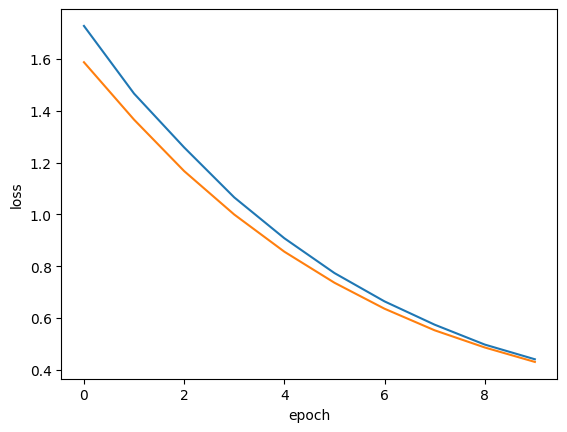

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

In [ ]:
 '''
 Vanishing gradient is a very common issue that occurs when training deep Neural Network
 It happens when the gradients used to update the Network
 become very small as they are propagated backward through the network
 Its causes:
 1. backpropagation - the Algorithm used to train Deep Neural Network is very deep that the gradient value bacome zero
 2. Recurrent Connection - Since the gradients are multiplied repeatedly during backpropagation it can also lead to dead Neuron
 Solutions i.e Batch Normalisation - this normalises the inputs to each layer within a mini batch
 3. Gradient Clipping i.e setting threshold for the magnitude of gradients during backpropagation
 4. Proper Weight Initialisation using xavier or he initialisation to ensure that gradients neither vanish nor explode
 5 Using Leaky relu function to prevent gradients from falling to the zero value
 6. Reducing model depth or complexity
 7. ResNet (Residual Networks) uses skip connections to allow gradients to bypass some layers and directly flow to deeper layers
 '''

'\nVanishing gradient is a very common issue that occurs when training deep Neural Network \nIt happens when the gradients used to update the Network\nbecome very small as they are propagated backward through the network\nIts causes: \n1. backpropagation - the Algorithm used to train Deep Neural Network is very deep that the gradient value bacome zero\n2. Recurrent Connection - Since the gradients are multiplied repeatedly during backpropagation it can also lead to dead Neuron \nSolutions i.e Batch Normalisation - this normalises the inputs to each layer within a mini batch \n3. Gradient Clipping i.e setting threshold for the magnitude of gradients during backpropagation\n4. Proper Weight Initialisation using xavier or he initialisation to ensure that gradients neither vanish nor explode\n5 Using Leaky relu function to prevent gradients from falling to the zero value\n6. Reducing model depth or complexity \n7. ResNet (Residual Networks) uses skip connections to allow gradients to bypas